##Loading data and importing libraries


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
pip install transformers[torch] -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup, DistilBertTokenizerFast, DistilBertForSequenceClassification
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from tqdm.auto import tqdm
import numpy as np
import os

In [ ]:
from sklearn.metrics import accuracy_score
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


##Distilbert model with 5 labels and SetFit/sst5 dataset are used

In sst5 dataset: "0" - very negative, "1" - negative, "2" - neutral, "3" - positive, "4" - very positive

In [ ]:
dataset = load_dataset("SetFit/sst5")
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2210
    })
})

In [ ]:
dataset["test"]


Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 2210
})

In [ ]:
dataset["train"]

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 8544
})

In [ ]:
dataset["validation"]

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 1101
})

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

In [ ]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.map(lambda examples: {'labels': examples['label']}, batched=True)
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/8544 [00:00<?, ? examples/s]

Map:   0%|          | 0/1101 [00:00<?, ? examples/s]

Map:   0%|          | 0/2210 [00:00<?, ? examples/s]

Map:   0%|          | 0/8544 [00:00<?, ? examples/s]

Map:   0%|          | 0/1101 [00:00<?, ? examples/s]

Map:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [ ]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["validation"]
test_dataset = tokenized_datasets["test"]

##Hyperparameter tuning

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

In [ ]:
learning_rates = [5e-5, 3e-5, 2e-5]
num_train_epochs = [2, 3, 4]

In [ ]:
best_accuracy = 0
best_lr = None
best_epoch = None

In [ ]:
for lr in learning_rates:
    for epoch in num_train_epochs:
        model_output_dir = f'./lr_{lr}_epochs_{epoch}'

        os.makedirs(model_output_dir, exist_ok=True)

        model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)
        model.to(device)

        training_args = TrainingArguments(
            output_dir=model_output_dir,
            num_train_epochs=epoch,
            learning_rate=lr,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=64,
            warmup_steps=500,
            weight_decay=0.01,
            logging_dir='./logs',
            logging_steps=10,
            evaluation_strategy="epoch",
            save_strategy="epoch",
            load_best_model_at_end=True,
            metric_for_best_model="accuracy",
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=tokenized_datasets["train"],
            eval_dataset=tokenized_datasets["validation"],
            compute_metrics=compute_metrics,
        )

        trainer.train()
        results = trainer.evaluate(tokenized_datasets["validation"])

        print(f"LR: {lr}, Epoch: {epoch}, Val Accuracy: {results['eval_accuracy']}")

        if results['eval_accuracy'] > best_accuracy:
            best_accuracy = results['eval_accuracy']
            best_model_path = model_output_dir

print(f"Best Hyperparameters -> LR: {best_lr}, Epochs: {best_epoch}, Best Val Accuracy: {best_accuracy}")
print(f"Best model saved at: {best_model_path}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.284000,1.193029,0.471390
2,1.068200,1.151383,0.496821


LR: 5e-05, Epoch: 2, Val Accuracy: 0.49682107175295187


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.275700,1.187982,0.465032
2,1.086900,1.169032,0.506812
3,0.583400,1.315706,0.508629


LR: 5e-05, Epoch: 3, Val Accuracy: 0.508628519527702


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.272500,1.196962,0.466848
2,1.103000,1.182873,0.483197
3,0.629100,1.372883,0.482289
4,0.379100,1.614274,0.484105


LR: 5e-05, Epoch: 4, Val Accuracy: 0.4841053587647593


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.257700,1.182478,0.467757
2,1.076800,1.149306,0.494096


LR: 3e-05, Epoch: 2, Val Accuracy: 0.4940962761126249


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.249400,1.179065,0.465940
2,1.079200,1.162684,0.493188
3,0.619100,1.244628,0.497729


LR: 3e-05, Epoch: 3, Val Accuracy: 0.4977293369663942


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.243400,1.181405,0.470481
2,1.121900,1.169122,0.486830
3,0.681700,1.279333,0.490463
4,0.553400,1.416140,0.494096


LR: 3e-05, Epoch: 4, Val Accuracy: 0.4940962761126249


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.264000,1.184592,0.477748


Epoch,Training Loss,Validation Loss,Accuracy
1,1.264000,1.184592,0.477748
2,1.081700,1.152910,0.495005


LR: 2e-05, Epoch: 2, Val Accuracy: 0.4950045413260672


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.241600,1.176094,0.471390
2,1.074800,1.170568,0.484105
3,0.692500,1.196358,0.505904


LR: 2e-05, Epoch: 3, Val Accuracy: 0.5059037238873751


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.246500,1.187053,0.473206
2,1.098200,1.167771,0.485014
3,0.707100,1.221514,0.495913
4,0.704500,1.299202,0.489555


LR: 2e-05, Epoch: 4, Val Accuracy: 0.49591280653950953
Best Hyperparameters -> LR: None, Epochs: None, Best Val Accuracy: 0.508628519527702
Best model saved at: ./lr_5e-05_epochs_3


##Model with learning rate 5e-05 and trained on 3 epochs is chosen

In [ ]:
model_output_dir = f'./lr_5e5_epochs_3_sst5'

os.makedirs(model_output_dir, exist_ok=True)

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)
model.to(device)

training_args = TrainingArguments(
    output_dir=model_output_dir,
    num_train_epochs=3,
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
)

trainer.train()
results = trainer.evaluate(tokenized_datasets["validation"])

print(f"LR: 5e-5, Epoch: 3, Val Accuracy: {results['eval_accuracy']}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.272100,1.196550,0.465940
2,1.081700,1.166314,0.492280
3,0.563100,1.338444,0.503179


LR: 5e-5, Epoch: 3, Val Accuracy: 0.5031789282470481


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainer.save_model('drive/MyDrive/model_sst5_final')

##Its perfomance evaluation

In [ ]:
from transformers import AutoModelForSequenceClassification

best_model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/model_sst5_final')

In [ ]:
from transformers import Trainer
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

trainer = Trainer(
    model=best_model
)

predictions = trainer.predict(tokenized_datasets["test"])
pred_labels = np.argmax(predictions.predictions, axis=1)

accuracy = accuracy_score(predictions.label_ids, pred_labels)

f1 = f1_score(predictions.label_ids, pred_labels, average='weighted')

print(f"Accuracy on Test Set: {accuracy}")
print(f"F1 Score on Test Set: {f1}")

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Accuracy on Test Set: 0.5361990950226244
F1 Score on Test Set: 0.5344589302709739


In [ ]:
precision = precision_score(predictions.label_ids, pred_labels, average='weighted')

recall = recall_score(predictions.label_ids, pred_labels, average='weighted')

print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")

Precision on Test Set: 0.5440486837104348
Recall on Test Set: 0.5361990950226244


In [ ]:
misclassified = [(i, pred, true) for i, (pred, true) in enumerate(zip(pred_labels, predictions.label_ids)) if pred != true]
test_texts = dataset["test"]['text']


In [ ]:
import pandas as pd

df_misclassified = pd.DataFrame(misclassified, columns=['Index', 'Predicted Label', 'True Label'])

df_misclassified['Text'] = df_misclassified['Index'].apply(lambda x: test_texts[x])

df_misclassified.to_csv('misclassified_predictions_sst5.csv', index=False)


In [ ]:
classified = [(i, pred, true) for i, (pred, true) in enumerate(zip(pred_labels, predictions.label_ids)) if pred == true]
test_texts = dataset["test"]['text']


In [ ]:
import pandas as pd

df_classified = pd.DataFrame(classified, columns=['Index', 'Predicted Label', 'True Label'])

df_classified['Text'] = df_classified['Index'].apply(lambda x: test_texts[x])

df_classified.to_csv('classified_predictions_sst5.csv', index=False)


In [ ]:
true_labels.size

2210

In [ ]:
pred_labels.size

2210

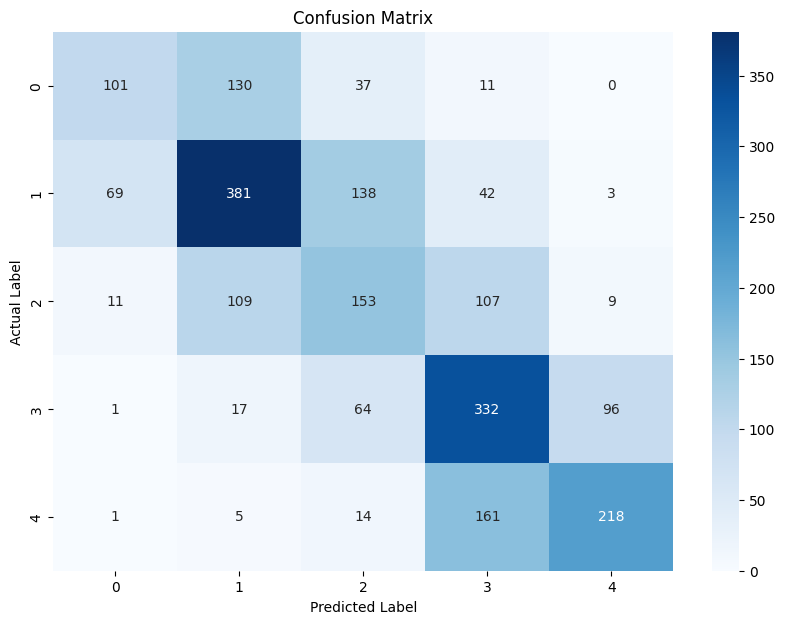

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = predictions.label_ids
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0", "1", "2", "3", "4"],
            yticklabels=["0", "1", "2", "3", "4"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


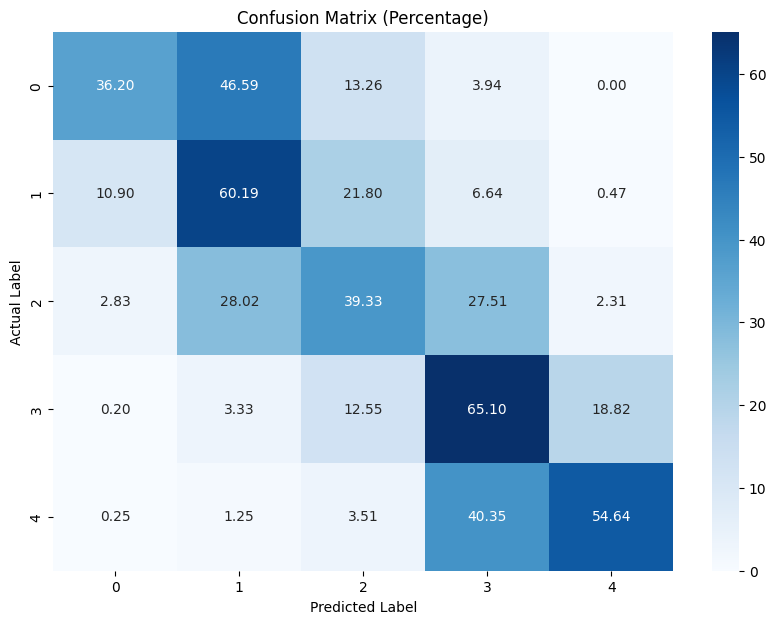

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

true_labels = predictions.label_ids
predicted_labels = pred_labels

cm = confusion_matrix(true_labels, predicted_labels)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["0", "1", "2", "3", "4"],
            yticklabels=["0", "1", "2", "3", "4"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix (Percentage)')
plt.show()
